In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from general_graph_utils import *

# Plot features

In [64]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

In [2]:
G, G_ud = random_graph(n=10)

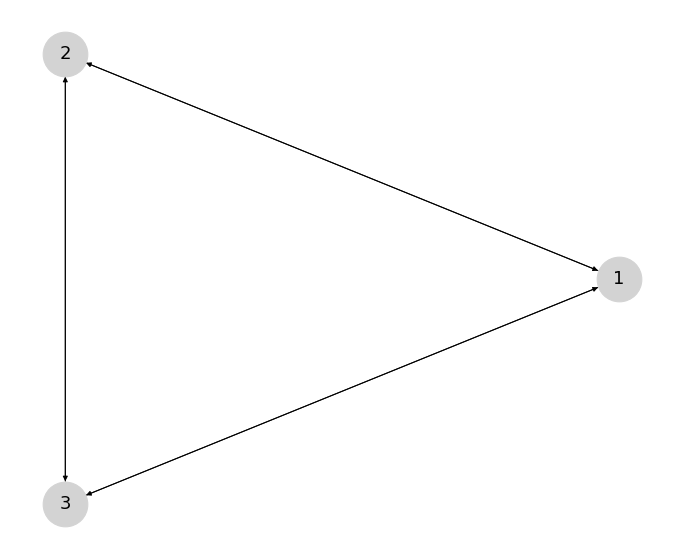

In [4]:
fig, ax = plt.subplots(figsize = (12, 10))
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=2000, node_color = 'lightgray', font_size=18, font_color='black', font_family='sans-serif')

In [5]:
node_list = get_nodes(G)
num_nodes = len(node_list)
print(node_list)

[1 2 3]


In [6]:
edge_list = get_edges(G)
print(edge_list)

[[1 3]
 [1 2]
 [2 3]
 [2 1]
 [3 1]
 [3 2]]


In [7]:
cycle_list = get_cycle_nodes(G_ud)
num_cycles = len(cycle_list)
print(cycle_list)

[[2, 3, 1]]


In [8]:
label_dict, label_list = get_labels(G)
print(label_dict)
print(label_list)

{(1, 3): 128.75782, (1, 2): 3.23877, (2, 3): 0.74722, (2, 1): 5.99538, (3, 1): 0.0603, (3, 2): 154.77577}
[1.2875782e+02 3.2387700e+00 7.4722000e-01 5.9953800e+00 6.0300000e-02
 1.5477577e+02]


In [9]:
cycle_edges_forward,cycle_edges_backward,cycle_labels_forward,cycle_labels_backward = get_cycle_labels_edges(cycle_list,label_dict)

In [10]:
cycle_labels_forward, edge_tracker = initial_equilibrium_parameters(cycle_list,cycle_edges_forward,cycle_labels_forward,cycle_labels_backward)

In [11]:
cycle_labels_forward

[[611780.8564650019, 0.0603, 3.23877]]

In [12]:
products_f, products_b = calculate_cycle_products(cycle_labels_forward,cycle_labels_backward)
total_affinities = calculate_affinities(products_f, products_b, cycle_list)
print(total_affinities)

[0.]


In [13]:
label_dict, label_list = reformat_labels(cycle_list, cycle_labels_forward, edge_tracker, label_dict, label_list)